# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Data

[Data Description](https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks)



In [2]:
url = "https://storage.googleapis.com/edulabs-public-datasets/sonar.csv"

In [3]:
df = pd.read_csv(url, header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
# True (1) for mine, 0 (false) for rock
df[60] = df[60].apply(lambda x: 1 if x == "M" else 0)

In [6]:
X = df.drop(60, axis=1)
y = df[60]

In [8]:
y

,60
0,0
1,0
2,0
3,0
4,0
...,...
203,1
204,1
205,1
206,1


In [9]:
y.value_counts()

,count
60,
1,111
0,97


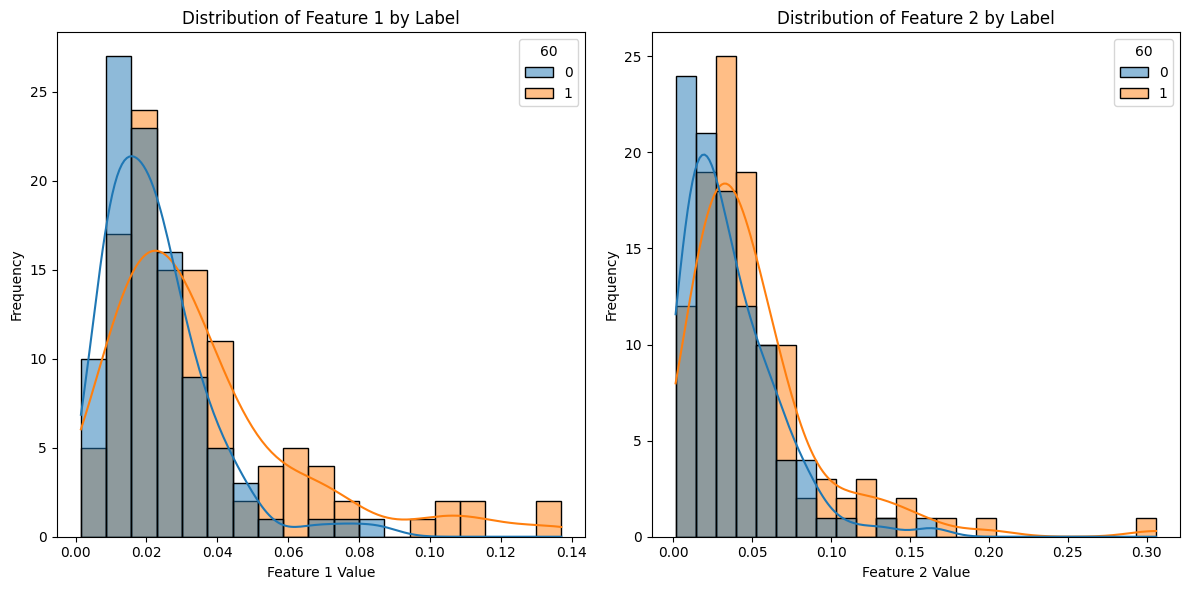

In [17]:
# prompt: plot graph of distributions per label in y, for features 1,2

import matplotlib.pyplot as plt
import seaborn as sns
# Plot distributions of features 1 and 2 based on the label
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=0, hue=60, kde=True)
plt.title('Distribution of Feature 1 by Label')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x=2, hue=60, kde=True)
plt.title('Distribution of Feature 2 by Label')
plt.xlabel('Feature 2 Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
df[60]

,60
0,0
1,0
2,0
3,0
4,0
...,...
203,1
204,1
205,1
206,1


In [13]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,0.000933
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055


Original shape: (208, 60)
Reduced shape: (208, 10)
Explained variance ratio by component: [0.31971149 0.2038306  0.0855582  0.06459322 0.05164156 0.04451402
 0.04207696 0.02632652 0.02230037 0.01921817]
Total explained variance: 0.8797711018479027


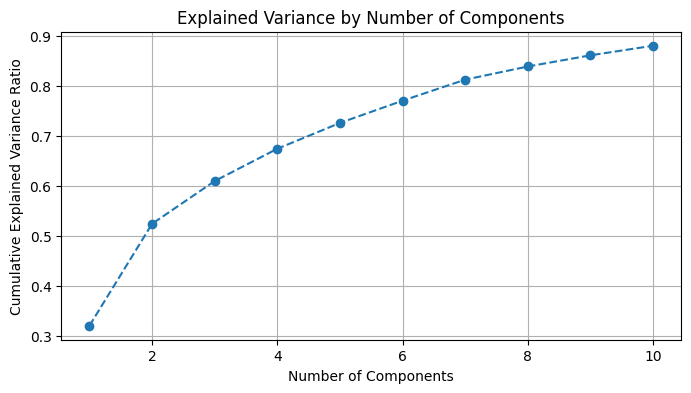

In [19]:
# prompt: perform dimentionality reduction with pca for X

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Initialize PCA
# Let's choose to reduce to 10 components as an example.
# You might need to choose a different number based on desired variance explained or domain knowledge.
n_components = 10
pca = PCA(n_components=n_components)

# Fit PCA on the features and transform the data
X_pca = pca.fit_transform(X)

# X_pca is the dimensionality-reduced data
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# Optionally, you can examine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by component:", explained_variance_ratio)
print("Total explained variance:", explained_variance_ratio.sum())

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Split dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Neural Network - Logistic regression

In [20]:
# Set random seed for TF
tf.random.set_seed(100)

In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [22]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)
# add other metrics!

In [23]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4691 - auc: 0.5185 - loss: 0.8623 - val_accuracy: 0.5952 - val_auc: 0.6398 - val_loss: 0.7085
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4862 - auc: 0.5368 - loss: 0.8353 - val_accuracy: 0.6190 - val_auc: 0.6511 - val_loss: 0.6957
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4862 - auc: 0.5459 - loss: 0.8134 - val_accuracy: 0.6190 - val_auc: 0.6705 - val_loss: 0.6833
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4963 - auc: 0.5572 - loss: 0.7930 - val_accuracy: 0.6190 - val_auc: 0.6852 - val_loss: 0.6716
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - auc: 0.5705 - loss: 0.7735 - val_accuracy: 0.6190 - val_auc: 0.7080 - val_loss: 0.6606
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5283 - auc: 0.5849 - loss: 0.7549 - val_accuracy: 0.6190 - val_auc: 0.7284 - val_loss: 0.6504
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - 

In [24]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
fig.update_layout(title='Loss')
fig.show()

**Overfit!**

Rule of thumb:

**Number of training examples should be at least 10× to 100× the number of model parameters.**

In [25]:
# try prediction
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.16764414],
       [0.15067796],
       [0.78197277],
       [0.82600886],
       [0.28957328]], dtype=float32)

In [ ]:
y_test[:5]

In [26]:
from sklearn import metrics
y_pred = model.predict(X_test).ravel()
y_pred = np.where(y_pred > 0.5, 1, 0)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [27]:
print(metrics.confusion_matrix(y_test, y_pred))

[[17  3]
 [ 7 15]]


In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42





#### 1. **Single split is fragile / possibly unlucky**

* One specific train/test split may have **non-representative validation data** — for example, easier or harder examples, or a different distribution than the training set.
* Overfitting might appear due to **variance in the data** rather than an issue with the model itself.

#### 2. **Cross-validation gives a more robust estimate**

* **5-fold CV averages** performance across multiple train/val partitions.
* It **smooths out fluctuations** caused by any one "bad" or unlucky split.
* If the model overfits only on one fold but generalizes well on others, the **average won't show strong overfit**.


> **Single train/val splits can be misleading. Cross-validation is statistically more reliable**, especially on small to medium datasets.




# Cross validation

In [30]:
from sklearn.model_selection import KFold

# Define model creation function
def create_model(X_train):
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    model = tf.keras.Sequential()
    model.add(normalizer)
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

# Set up K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=100)

scores = []
train_scores = []

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = create_model(X_train)  # New instance each time
    model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score[1])  # accuracy
    train_score = model.evaluate(X_train, y_train, verbose=0)
    train_scores.append(train_score[1])
    print(f"Validation accuracy: {score[1]:.4f}")
    print(f"Train accuracy: {train_score[1]:.4f}")
    print()

print(f"Average accuracy: {np.mean(scores):.4f}")
print(f"Average train accuracy: {np.mean(train_scores):.4f}")

Validation accuracy: 0.8095
Train accuracy: 0.8554

Validation accuracy: 0.7619
Train accuracy: 0.8735

Validation accuracy: 0.8095
Train accuracy: 0.8735

Validation accuracy: 0.7805
Train accuracy: 0.8623

Validation accuracy: 0.7561
Train accuracy: 0.8982

Average accuracy: 0.7835
Average train accuracy: 0.8726


In [ ]:
# model = create_model(X_train)

# DNN

We know it will not work - but just for the presentation

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(60,)),
    normalizer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

In [34]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 60)             │           121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.36 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 121 (488.00 B)

In [37]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - auc_2: 1.0000 - loss: 0.0697 - val_accuracy: 0.9048 - val_auc_2: 0.9500 - val_loss: 0.2688
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - auc_2: 1.0000 - loss: 0.0684 - val_accuracy: 0.9048 - val_auc_2: 0.9500 - val_loss: 0.2686
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - auc_2: 1.0000 - loss: 0.0671 - val_accuracy: 0.9048 - val_auc_2: 0.9511 - val_loss: 0.2685
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - auc_2: 1.0000 - loss: 0.0659 - val_accuracy: 0.9048 - val_auc_2: 0.9511 - val_loss: 0.2683
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - auc_2: 1.0000 - loss: 0.0647 - val_accuracy: 0.9048 - val_auc_2: 0.9511 - val_loss: 0.2683
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - auc_2: 1.0000 - loss: 0.0635 - val_accuracy: 0.9048 - val_auc_2: 0.9500 - val_loss: 0.2685
Epoch 7/100
6/6 ━━━━━━━━━━━━

In [38]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
fig.update_layout(title='Loss')
fig.show()

# Reduce the amount of features and train NN